## Task 2: Classical ML model ##
Choosing wisely: n=298, and a "classical" approach must be made. We will proceed with logistic regression.


In [2]:
# Import libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
import os


In [3]:
# Step 1: Data Collection and Preprocessing
database = pd.read_csv('models/ml-model2.model')
# Data preprocessing steps here...

# Cutoff point is 30 days, so all of those patients with higher time values are still alive for the sake of the model
database.loc[database['time'] > 30, 'DEATH_EVENT'] = 0


In [4]:

# Split data into features and target variable
X = database.drop(columns=['DEATH_EVENT'])  
y = database['DEATH_EVENT']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Model Training - Logistic Regression
model = LogisticRegression()  # Logistic Regression model
model.fit(X_train, y_train)


# Step 3: Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)


# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


In [5]:
# Step 4: Saving the Model
joblib.dump(model, (os.path.join('..', 'models', 'ml-model2.model')))  # Save the model in the 'models' folder

['models/ml-model.model']

In [6]:
# Validation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.95
Precision: 0.8333333333333334
Recall: 0.7142857142857143
F1 Score: 0.7692307692307692
ROC AUC Score: 0.8477088948787063


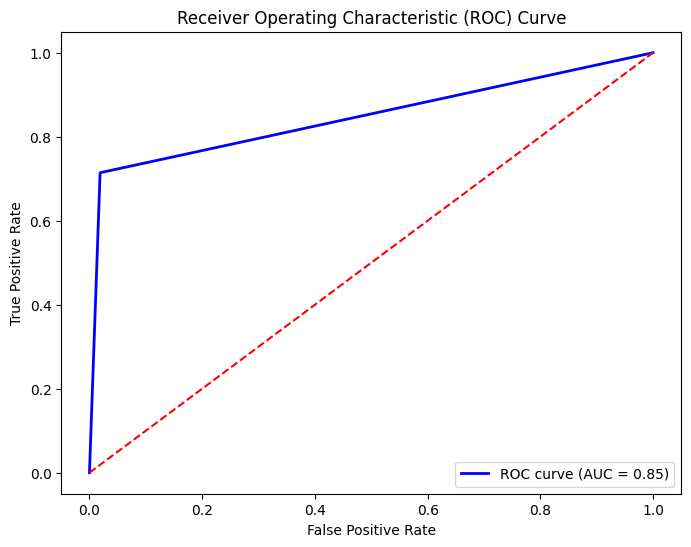

Accuracy: 0.95
Confusion Matrix:
[[52  1]
 [ 2  5]]


In [7]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display accuracy and confusion matrix
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)